
# Yellow Taxi Trip Records Data Analysis




## Objective of this Jupyter Notebook


**How is it structured ?**

- Broad overview 
- Data cleaning
- Data vizualisation
- Descriptive analysis




## Hands on


In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

_Here we import pandas and numpy library, alongside seaborn which is a data visualization library of Matplotlib, and the pyplot module from matplotlib library. At the end, we matplotlib plots directly in this interface.
np , pd , and plt are alias that refers to the libraries or module._

## Loading our data

In [2]:
file_path = 'C:/Users/deans/Desktop/LYNX_data_analysis/Yellow_Taxi_Assignment.csv/Yellow_Taxi_Assignment.csv'
yt = pd.read_csv(file_path)


_The code above creates a pandas DataFrame by reading the data from the Excel file specified by 'file_path'. Then we will have a glance about it structure._


## The data at a glance


_The following codes are uses to depicts a general framework of the data we have within the csv file._


In [3]:
yt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


_This is to get an idea about the categories of the information within the file. It also helps check the correspondance with the data dictionary._

In [4]:
yt.shape

(304978, 19)

_the data holds 304.978 inputs (row) and 19 categories (column)._


In [5]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

Variables such as '**passenger_count**' , '**RatecodeID**', '**store_and_fwd_flag**' , '**congestion_surcharge**' , '**airport_fee**' hold some missing data. 

_It does not necessary mean that the missing rows need to be removed. However we have to be mindfull of missing data from the variables '**store_and_fwd_flag**' since such information should be automatically registered. Hence, imputation might occur._ 

In [6]:
yt.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,304978.000000,295465.000000,304978.000000,295465.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,232346.000000,106217.000000
mean,1.672786,1.479126,4.587589,1.142931,163.744975,160.988898,1.240463,13.510189,0.903506,0.492755,2.224064,0.390715,0.312725,19.050501,2.241650,0.085815
std,0.514069,1.108255,434.226624,2.969941,66.570490,70.975905,0.528257,12.636651,1.185321,0.074023,2.765200,1.699547,0.110404,15.464014,0.791877,0.318628
min,1.000000,0.000000,-16.860000,1.000000,1.000000,1.000000,0.000000,-197.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000
25%,1.000000,1.000000,1.000000,1.000000,121.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000
50%,2.000000,1.000000,1.730000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,0.000000
75%,2.000000,2.000000,3.210000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,0.000000
max,6.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,5.000000,455.000000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000


- The **VendorID** should only hold values of 1 or 2.The fact that the max is 6 means that some row need to be imputed because any different inputs has no meaning. 
- **trip_distance** requires imputation since it hold negative numbers. It also holds some abnormal number since the max is **177247** miles.
- The same goes for **RatecodeID** since the highest value is 99 when it should be 6.
- **payment_type** needs some imputation since the column hold value **0** when the min should be **1**.
- **fare_amount** needs some imputation since it hold negative numbers. It was to be expected since the **trip_distance** variable hold negative values. 
- **'extra' , 'mta_tax' , 'tip_amount'  , 'tolls_amount' , 'improvement_surcharge'** need imputations rince they hold negative numbers.


## Data cleaning

Steps that we will undertake : 
- Seeking and finding missing data 
- Correcting missing data if exist
- Seeking errors 
- Seeking duplications if necessary

. 

_**Be aware that** the imputation processes that are performed here are only done for the purpose of the assignment. For a real-life scenario, such process would require the permission form the authorization employees._ 


In [7]:
yt['VendorID'].value_counts()

2    201068
1    102886
6       521
4       500
5         3
Name: VendorID, dtype: int64

In [8]:
yt = yt[~yt['VendorID'].isin([6,4,5])]
yt['VendorID'].value_counts()

2    201068
1    102886
Name: VendorID, dtype: int64

We know from the data library that the VendorID can only come from 2 different sources which are labelled as **1** or **2** . Hence, We using boolean indexing to select the rows where the '**VendorID**' does not has the values of **6, 4, 5** .


We will next analyze the dropoff (**'tpep_dropoff_datetime'**) and pickup datetime (**'tpep_pickup_datetime'**). We will start by assigning those variables the datetime object then remove all the rows when the dropoff datetime is earlier than the pickup datetime. 

In [9]:
yt['tpep_dropoff_datetime'] = pd.to_datetime(yt['tpep_dropoff_datetime'])
yt['tpep_pickup_datetime'] = pd.to_datetime(yt['tpep_pickup_datetime'])
toberemove = (yt['tpep_dropoff_datetime'] < yt['tpep_pickup_datetime']).sum()
print("Number of row when dropoff datetime is ", toberemove)

Number of row when dropoff datetime is  1


In [10]:
yt = yt[yt['tpep_dropoff_datetime'] > yt['tpep_pickup_datetime']]

.

In [11]:
yt['RatecodeID'].value_counts()

1.0     284620
2.0       7369
5.0       1586
3.0        620
4.0        301
99.0       260
6.0          1
Name: RatecodeID, dtype: int64

Since **'RatecodeID'** holds values (value **99**) that are difference than the one define in the dictionary, we should remove them since they are not exploitable.

There below we will use boolean indexing to consider all the rows except the ones with value 99.

In [12]:
yt = yt[~yt['RatecodeID'].isin([99])]
yt['RatecodeID'].value_counts()

1.0    284620
2.0      7369
5.0      1586
3.0       620
4.0       301
6.0         1
Name: RatecodeID, dtype: int64

.

In [13]:
yt = yt[~yt['payment_type'].isin([0])]
yt['payment_type'].value_counts()

1    216025
2     75571
3      1761
4      1140
Name: payment_type, dtype: int64

The following code will only consider the row when the value of the variables '**fare_amount**', '**trip_distance**', '**extra**', '**mta_tax**', '**tip_amount**', '**tolls_amount**','**total_amount**', '**improvement_surcharge**', '**congestion_surcharge**', '**airport_fee**','**congestion_surcharge**' are superior or equal to 0 in order to get ride of the negative values. 

In [14]:
yt = yt[(yt['fare_amount'] >= 0) & (yt['trip_distance'] >= 0) & (yt['extra'] >= 0) & (yt['mta_tax'] >= 0) & (yt['tip_amount'] >= 0) & (yt['tolls_amount'] >= 0) & (yt['total_amount'] >= 0)  & (yt['improvement_surcharge'] >= 0) & (yt['congestion_surcharge'] >=0) & (yt['airport_fee'] >=0) & (yt['congestion_surcharge'] >= 0)]

_By getting ride of the negative values for the following variables , we deleted around **199400** rows worth of information._


(confirmed by using the .info() function before and after using this line of code)


In [15]:
yt['store_and_fwd_flag'].value_counts()

N    103860
Y      1412
Name: store_and_fwd_flag, dtype: int64

.

In [16]:
missing_valu = yt.isnull().sum()
display(missing_valu)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

_After verifying that the data is cleaned we will take a general look of the data frame to make sure that we got ride of the obvious impediments._ 

In [17]:
yt.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000
mean,1.705496,1.412816,3.309407,1.068299,165.524251,163.146943,1.227078,14.219000,1.081391,0.495888,2.626014,0.467785,0.342829,20.940300,2.318905,0.087143
std,0.455822,0.991906,4.279058,0.392999,64.895542,70.286498,0.444257,13.299269,1.289947,0.047348,3.037964,1.863067,0.168066,16.567807,0.648030,0.318333
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.100000,1.000000,132.000000,113.000000,1.000000,7.000000,0.000000,0.500000,0.500000,0.000000,0.300000,12.090000,2.500000,0.000000
50%,2.000000,1.000000,1.820000,1.000000,162.000000,162.000000,1.000000,10.000000,0.500000,0.500000,2.080000,0.000000,0.300000,15.730000,2.500000,0.000000
75%,2.000000,1.000000,3.320000,1.000000,234.000000,234.000000,1.000000,15.500000,2.500000,0.500000,3.260000,0.000000,0.300000,21.960000,2.500000,0.000000
max,2.000000,6.000000,99.200000,6.000000,265.000000,265.000000,4.000000,455.000000,11.250000,2.540000,115.560000,96.550000,1.000000,455.800000,2.750000,1.250000


In [18]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105272 entries, 194489 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               105272 non-null  int64         
 1   tpep_pickup_datetime   105272 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  105272 non-null  datetime64[ns]
 3   passenger_count        105272 non-null  float64       
 4   trip_distance          105272 non-null  float64       
 5   RatecodeID             105272 non-null  float64       
 6   store_and_fwd_flag     105272 non-null  object        
 7   PULocationID           105272 non-null  int64         
 8   DOLocationID           105272 non-null  int64         
 9   payment_type           105272 non-null  int64         
 10  fare_amount            105272 non-null  float64       
 11  extra                  105272 non-null  float64       
 12  mta_tax                105272 non-null 

After cleaning and imputing our dataset, **105272** entries remain from the total **304978** .

## Exporting the cleaned dataset

It might be useful, for future use to export the cleaned database to a CSV or excel file.

In [18]:
yt.to_excel('C:/Users/deans/Desktop/LYNX_data_analysis/Yellow_Taxi_Assignment.csv/Yello_taxi_cleaned.xlsx', index=False)


## Creating new variables


For the purpose of our analysis we will create a set of new variables that :
- **trip_duration** which is a difference between the pick up time an dropoff time
- **trip_route** which the label A - B of a trip
- **trip_additional_charge** a difference between total amount charged and fare-amount



In [84]:
yt['trip_duration'] = (yt['tpep_dropoff_datetime'] - yt['tpep_pickup_datetime']).dt.total_seconds() / 60
yt['trip_duration'] = yt['trip_duration'].astype(int) 


_The codes above, first, change the data type of the dropoff and pickup variables from string to actual datetime object so that we could perform the the calculation of the trip duration_


In [91]:
yt['trip_route'] = yt.apply(lambda row: f"{row['PULocationID']}-{row['DOLocationID']}", axis=1)


.

In [92]:
yt['trip_additional_charge'] = yt['total_amount'] - yt['fare_amount']

In [22]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105272 entries, 194489 to 304977
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   VendorID                105272 non-null  int64         
 1   tpep_pickup_datetime    105272 non-null  datetime64[ns]
 2   tpep_dropoff_datetime   105272 non-null  datetime64[ns]
 3   passenger_count         105272 non-null  float64       
 4   trip_distance           105272 non-null  float64       
 5   RatecodeID              105272 non-null  float64       
 6   store_and_fwd_flag      105272 non-null  object        
 7   PULocationID            105272 non-null  int64         
 8   DOLocationID            105272 non-null  int64         
 9   payment_type            105272 non-null  int64         
 10  fare_amount             105272 non-null  float64       
 11  extra                   105272 non-null  float64       
 12  mta_tax                 1

In [93]:
yt.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_additional_charge
count,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000,105272.000000
mean,1.705496,1.412816,3.309407,1.068299,165.524251,163.146943,1.227078,14.219000,1.081391,0.495888,2.626014,0.467785,0.342829,20.940300,2.318905,0.087143,16.455439,6.721300
std,0.455822,0.991906,4.279058,0.392999,64.895542,70.286498,0.444257,13.299269,1.289947,0.047348,3.037964,1.863067,0.168066,16.567807,0.648030,0.318333,55.584578,4.453501
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.100000,1.000000,132.000000,113.000000,1.000000,7.000000,0.000000,0.500000,0.500000,0.000000,0.300000,12.090000,2.500000,0.000000,7.000000,4.300000
50%,2.000000,1.000000,1.820000,1.000000,162.000000,162.000000,1.000000,10.000000,0.500000,0.500000,2.080000,0.000000,0.300000,15.730000,2.500000,0.000000,11.000000,5.850000
75%,2.000000,1.000000,3.320000,1.000000,234.000000,234.000000,1.000000,15.500000,2.500000,0.500000,3.260000,0.000000,0.300000,21.960000,2.500000,0.000000,18.000000,7.240000
max,2.000000,6.000000,99.200000,6.000000,265.000000,265.000000,4.000000,455.000000,11.250000,2.540000,115.560000,96.550000,1.000000,455.800000,2.750000,1.250000,1439.000000,116.860000


## Numerical/Individual Analysis and Visualization

#### _Providers of the trip records_

Text(0.5, 1.0, 'Vendors Distribution')

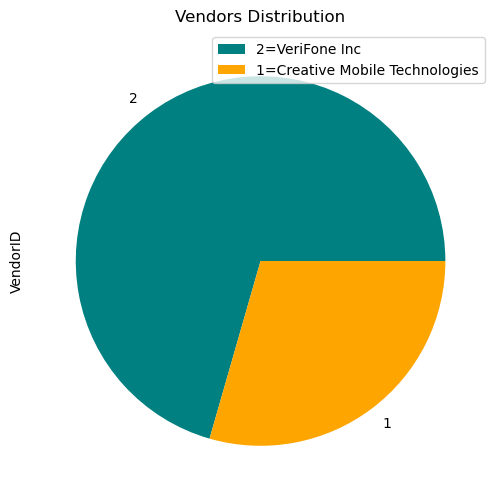

In [94]:
yt['VendorID'].value_counts().plot(kind='pie', figsize=(6,6), colors=['teal', 'orange'])

labels = ['2=VeriFone Inc', '1=Creative Mobile Technologies']

plt.legend(labels, loc="best")
plt.title("Vendors Distribution")

In [95]:

yt_percentage = (yt['VendorID'].value_counts() / len(yt)) * 100
print(yt_percentage)


2    70.549624
1    29.450376
Name: VendorID, dtype: float64


_**Creative Mobile Technologies, LLC** is the mainly used TPEP record provider by **70,6 %** of the population._

.

#### _Access to a connection to the server during a trip_


In [96]:
store_and_fwd_percentage = (yt['store_and_fwd_flag'].value_counts() / len(yt)) * 100
print(store_and_fwd_percentage)

N    98.658713
Y     1.341287
Name: store_and_fwd_flag, dtype: float64



_Even though most of the trips were recorded directly on the TPEP trip record server, barely **1,34 %** of them were forwarded to the vendor after the trip does to failure to connect to the server._


Text(0.5, 1.0, 'Access to server distribution during a trip')

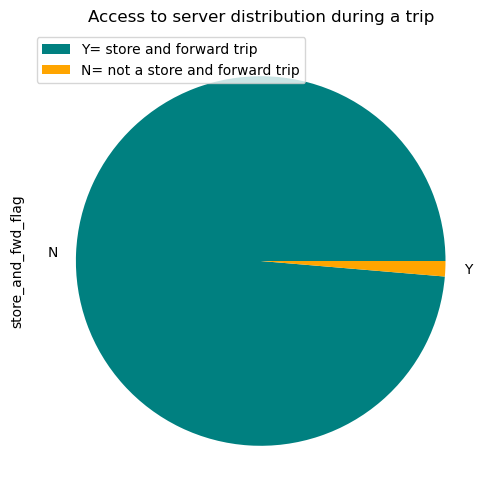

In [97]:
yt['store_and_fwd_flag'].value_counts().plot(kind='pie', figsize=(6,6), colors=['teal', 'orange'])
labels = ['Y= store and forward trip', 'N= not a store and forward trip']
plt.legend(labels)
plt.title("Access to server distribution during a trip")

#### _Trip Durations_

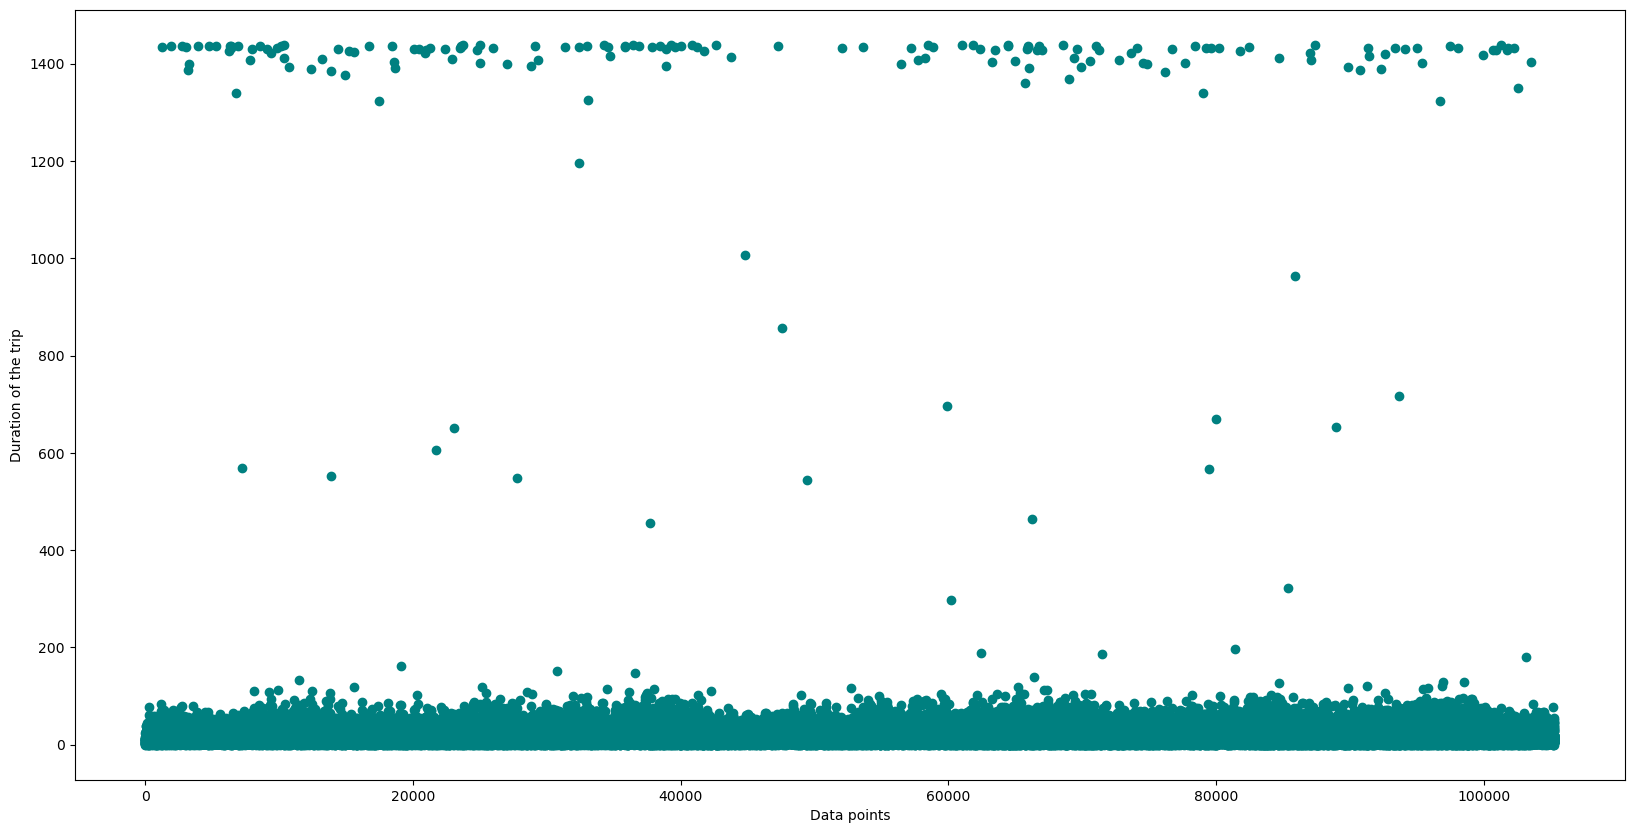

In [98]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(yt)), yt['trip_duration'], color='teal')
plt.xlabel('Data points')
plt.ylabel('Duration of the trip')
plt.show()

_The code below convert a continuous variable (**'trip_duration'**) into a variable with multiple categories using the pd.cut() function from pandas library._ 

_Using bin you can create the limits of the categories and the labels allow you to name each category._

_I performed the operation within the variable itself._

In [29]:
td_edges = [0, 100, 200, 1200, float('inf')]
td_labels = ['Less than 1h40', '1h40 - 2h', '2h - 20h', 'More than 20h']
yt['trip_duration'] = pd.cut(yt['trip_duration'], bins=td_edges, labels=td_labels, right=False)

In [30]:
yt['trip_duration'].value_counts()

Less than 1h40    105045
More than 20h        153
1h40 - 2h             55
2h - 20h              19
Name: trip_duration, dtype: int64

_According to a broad dataset representation, In average the trips last around 17 minutes. From the representation above the vast majority of them last under 100 Minutes or 1h40 Hours. There are also some values that needs attention since they registered trips that lasts more than 20 hours._  

#### _Passanger Count_

Text(0, 0.5, 'Number of Passengers')

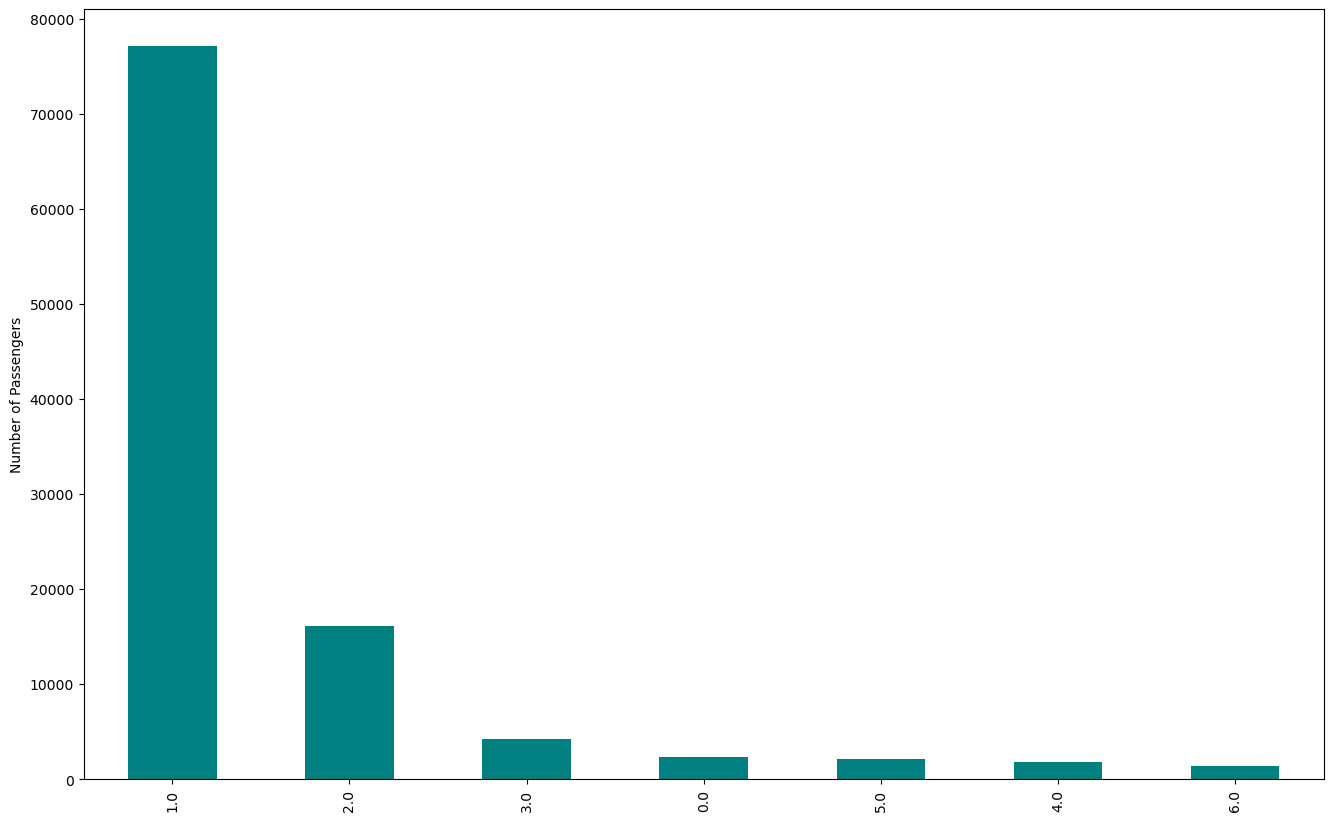

In [99]:
ax = yt['passenger_count'].value_counts().plot(kind='bar', figsize=(16,10), color='teal')
ax.set_ylabel('Number of Passengers')

In [32]:
yt['passenger_count'].value_counts()

1.0    77162
2.0    16167
3.0     4226
0.0     2318
5.0     2146
4.0     1846
6.0     1407
Name: passenger_count, dtype: int64

_According to the drivers, the mainly carries 1 or 2 passengers. However, some also mentionned to go up to 6 passengers per trip._ 

_It is also interesting to mention that around 98.000 of the trip routes are recurrent. And the most recurrent one is the one that goes from the area 237 to the area 236._

In [33]:
yt['trip_route'].describe()

count      105272
unique       6843
top       237-236
freq          782
Name: trip_route, dtype: object

.


#### _Distribution of the total amount paid for a trip._

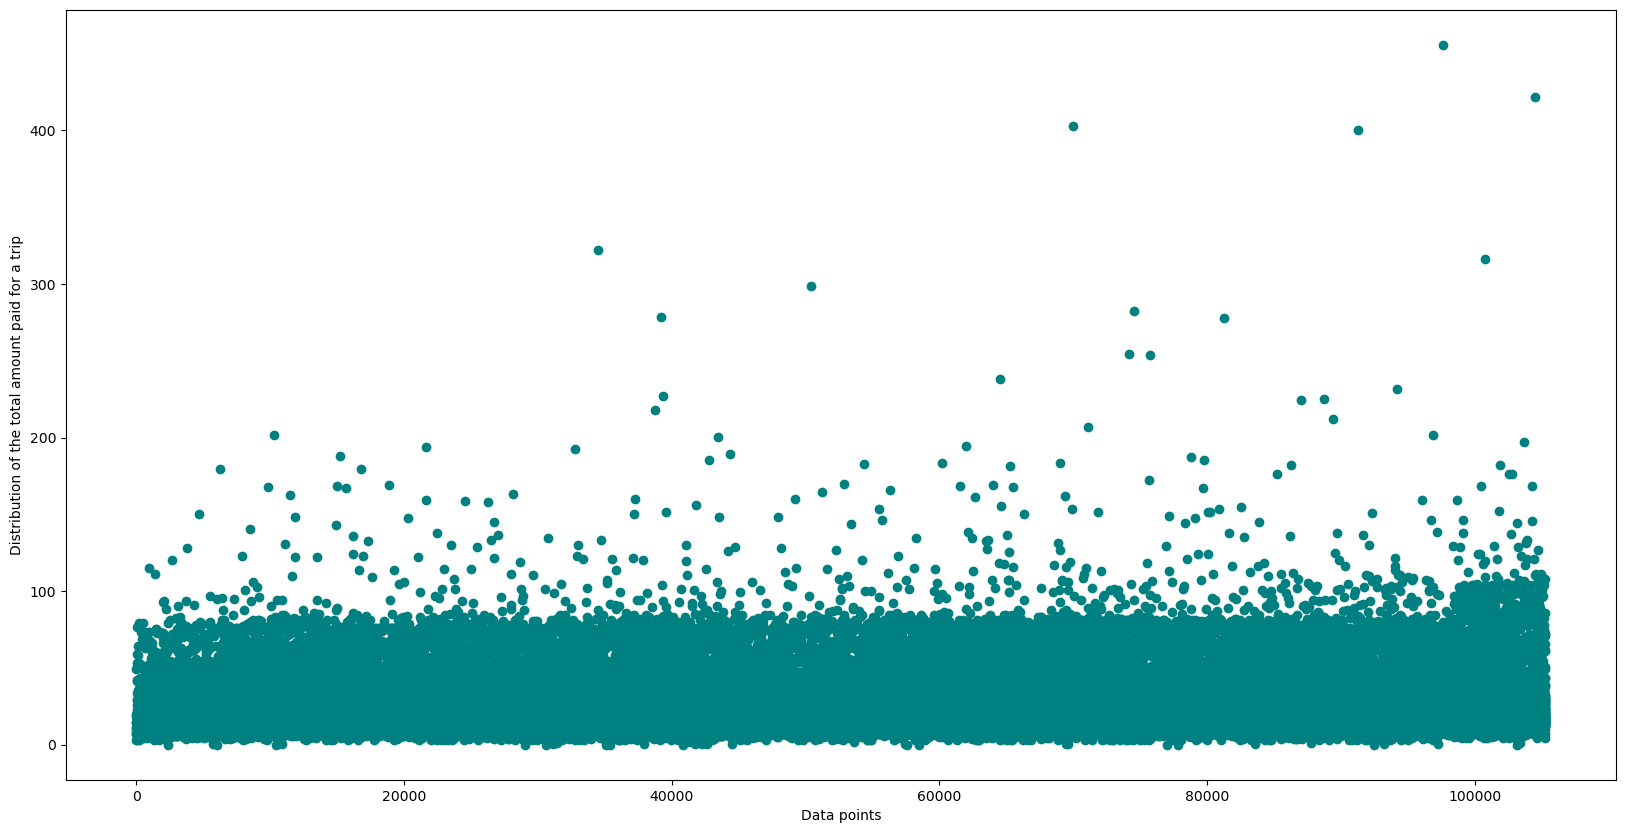

In [34]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(yt)), yt['total_amount'], color='teal')
plt.xlabel('Data points')
plt.ylabel('Distribution of the total amount paid for a trip')
plt.show()

_The code below convert a continuous variable (**'total_amount'**) into a variable with multiple categories using the pd.cut() function from pandas library._ 

_Using bin you can create the limits of the categories and the labels allow you to name each category._

_I created a new variable to perfom the operation._

In [35]:
ta_edges = [0, 20, 40, 60, 100, float('inf')]
ta_labels = ['Less than 20$', '20$ - 40$', '40 - 60$', '60$ - 100$', 'More than 100$']
yt['total_amount_category'] = pd.cut(yt['total_amount'], bins=ta_edges, labels=ta_labels, right=False)
yt['total_amount_category'].value_counts()

Less than 20$     72941
20$ - 40$         22099
40 - 60$           4986
60$ - 100$         4869
More than 100$      377
Name: total_amount_category, dtype: int64

_We can understand from the scatter above that the vast majority of the trips (roughly 95 Thousands) costed less then 60$._ 

_Moreover, it is important to mention that **69,3%** of the total recorded trip costed less than 20$._   

In [36]:
tac_percentage = (yt['total_amount_category'].value_counts() / len(yt)) * 100
print(tac_percentage)

Less than 20$     69.288130
20$ - 40$         20.992287
40 - 60$           4.736302
60$ - 100$         4.625161
More than 100$     0.358120
Name: total_amount_category, dtype: float64


.

#### _Distribution of the trip rates_

_Most of the trips (roughly 100K counts of trip) were labelled as **Standard** at the end. 

Text(0, 0.5, 'Distribution of the trip rates')

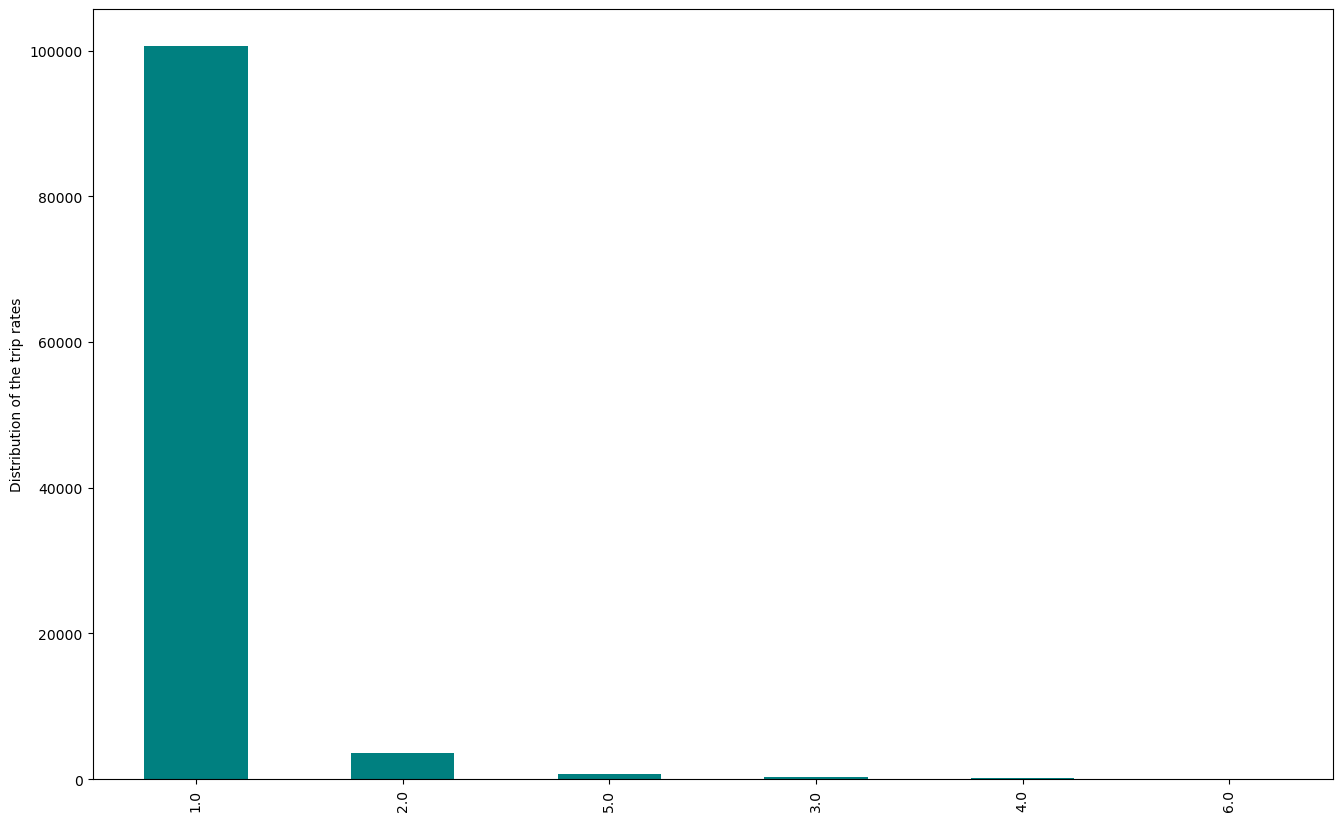

In [37]:
ax = yt['RatecodeID'].value_counts().plot(kind='bar', figsize=(16,10), color='teal')
ax.set_ylabel('Distribution of the trip rates')

In [38]:
yt['RatecodeID'].value_counts()

1.0    100664
2.0      3535
5.0       686
3.0       252
4.0       134
6.0         1
Name: RatecodeID, dtype: int64

.

#### _Distribution of the tips_

In [39]:
tips_edges = [0, 5, 10, 15, 20, float('inf')]
tips_labels = ['Less than 5$', '5$ - 10$', '10$ - 15$', '15 - 20$', 'More than 20$']
yt['tips_category'] = pd.cut(yt['tip_amount'], bins=tips_edges, labels=tips_labels, right=False)
yt['tips_category'].value_counts()

Less than 5$     92906
5$ - 10$          8225
10$ - 15$         3214
15 - 20$           691
More than 20$      236
Name: tips_category, dtype: int64

_**2,63** dollars is the average tips that was paid for a trip. Both from the visual representation and the values of the dataset, it can be infered that most of the tips paid were under 5 dollars._ 

_Some exceptions reached the upper 40 dollars to reach a maximum of 115.56 $_   

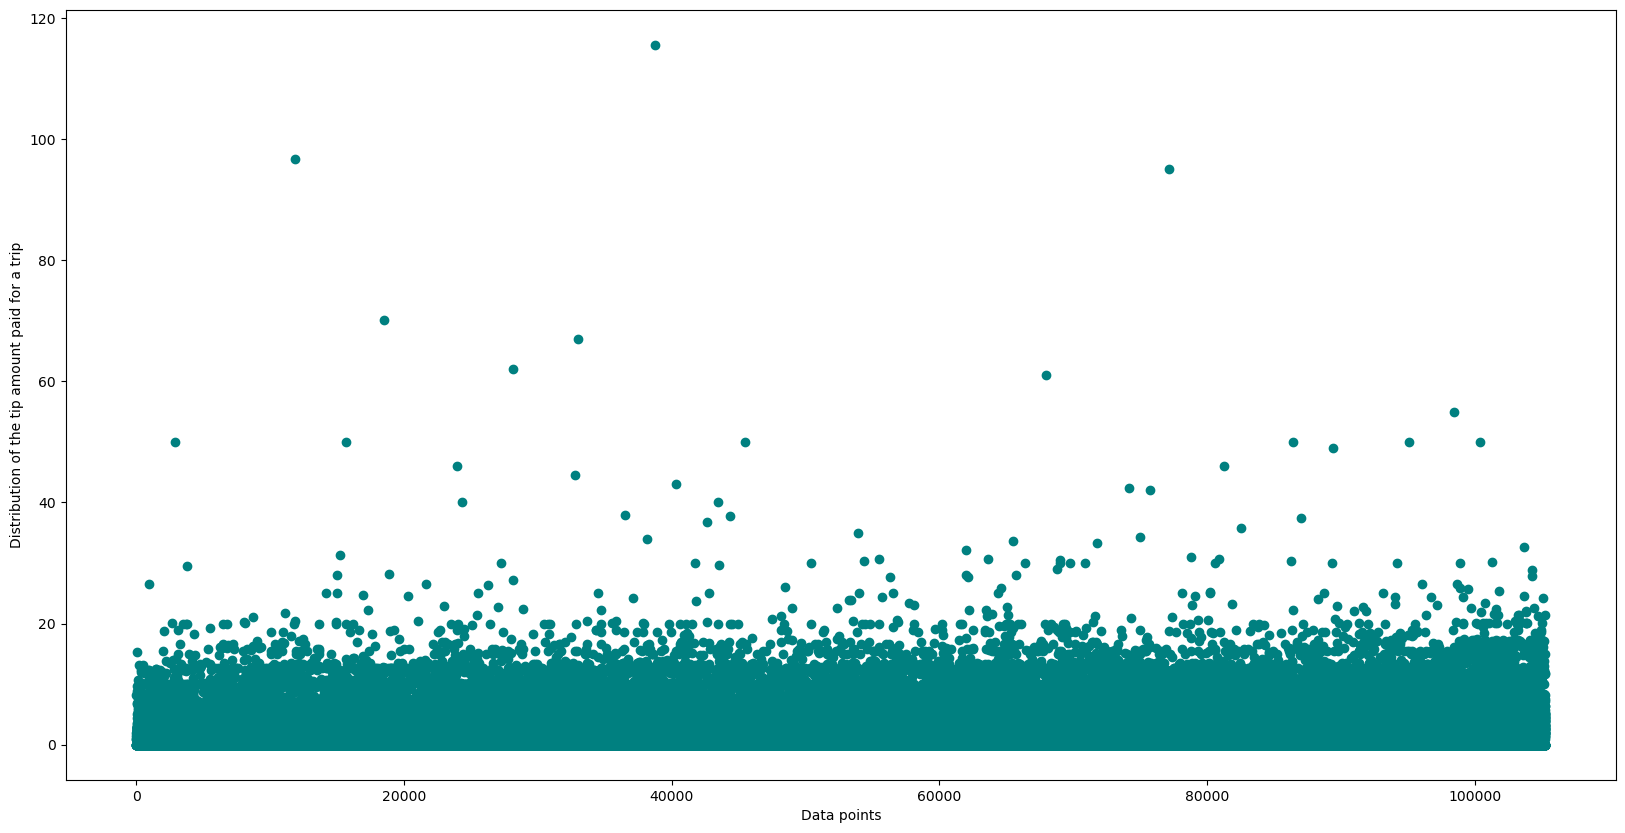

In [40]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(yt)), yt['tip_amount'], color='teal')
plt.xlabel('Data points')
plt.ylabel('Distribution of the tip amount paid for a trip')
plt.show()

.

#### _Distribution of the payment methods_

Text(0, 0.5, 'Distribution of the type of payment methods')

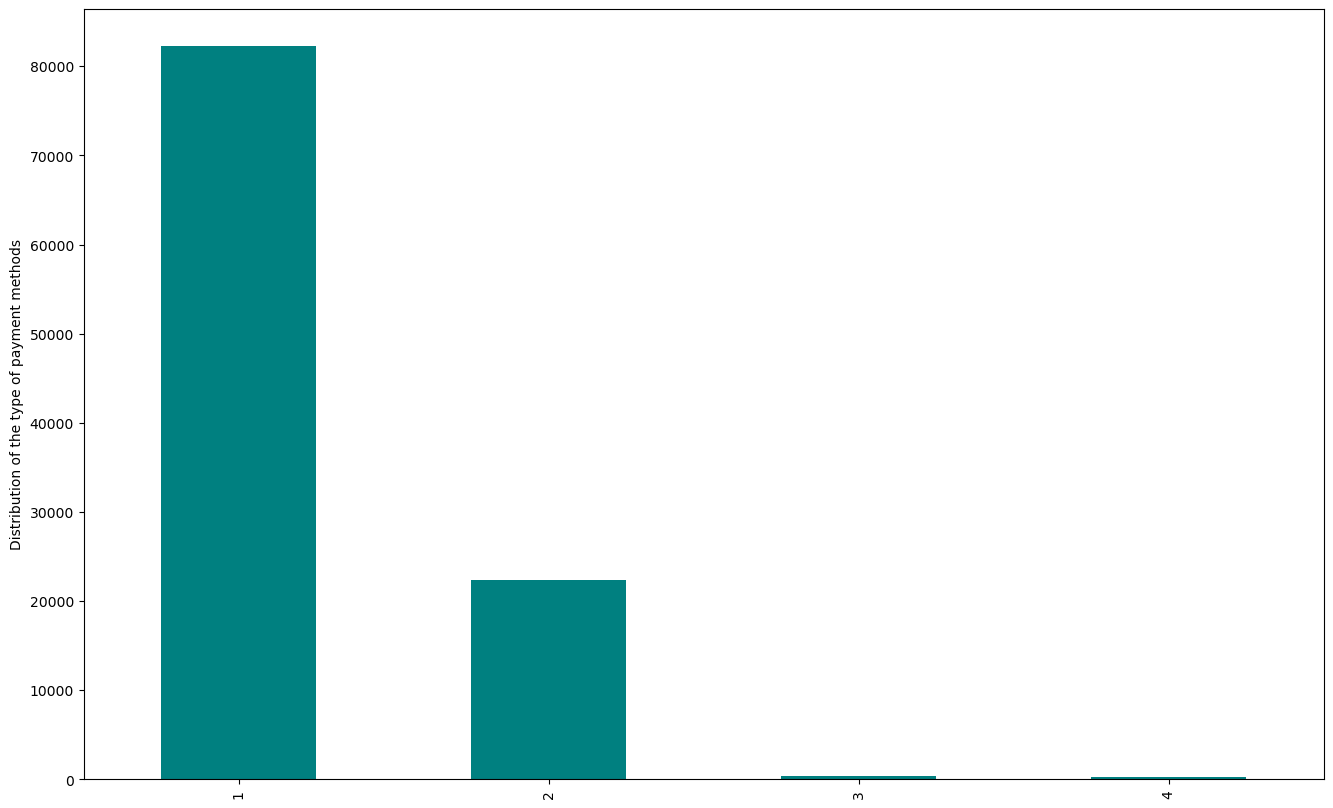

In [41]:
ax = yt['payment_type'].value_counts().plot(kind='bar', figsize=(16,10), color='teal')
ax.set_ylabel('Distribution of the type of payment methods')

_The vizualisation of the **'payment_type'** distribution already proved that there is a vast majority of the trips that were paid via **credit card** (**'1'**) and via **cash** (**'2'**) ._  

In [90]:
payment_type_percentage = (yt['payment_type'].value_counts() / len(yt)) * 100
print(payment_type_percentage)

1    78.151835
2    21.221217
3     0.394217
4     0.232730
Name: payment_type, dtype: float64


From the figures above the payment by credit card represents roughly **78,15 %**, and **21,2 %** of the trips were paid cash. 

.

#### _Distribution of the additional cost of the trips_

In [51]:
yt['trip_additional_charge'].count()

105272

First and foremost, all passengers were required to pay additional cost besides the fare cost.


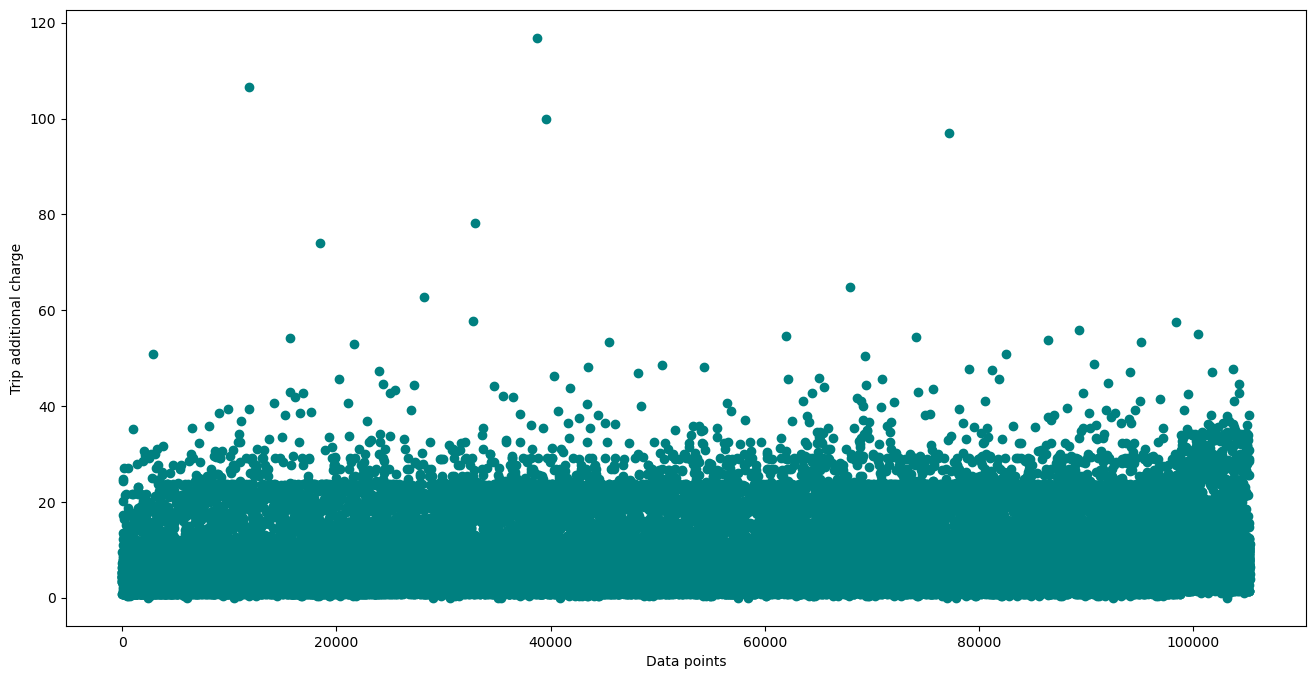

In [89]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(yt)), yt['trip_additional_charge'], color='teal')
plt.xlabel('Data points')
plt.ylabel('Trip additional charge')
plt.show()

In [88]:

tripadd_edges = [0, 5, 10, 15, 20, float('inf')]
tripadd_labels = ['Less than 5$', '5$ - 10$', '10$ - 15$', '15 - 20$', 'More than 20$']
yt['trip_additional_charge_category'] = pd.cut(yt['trip_additional_charge'], bins=tips_edges, labels=tips_labels, right=False)
yt['trip_additional_charge_category'].value_counts()

5$ - 10$         61325
Less than 5$     33612
10$ - 15$         4482
More than 20$     3340
15 - 20$          2513
Name: trip_additional_charge_category, dtype: int64

In [53]:
trip_additional_charge_category_percentage = (yt['trip_additional_charge_category'].value_counts() / len(yt)) * 100
print(trip_additional_charge_category_percentage)

5$ - 10$         58.253857
Less than 5$     31.928718
10$ - 15$         4.257542
More than 20$     3.172733
15 - 20$          2.387149
Name: trip_additional_charge_category, dtype: float64


_**58,25%** of passengers paid between 5 to 10 dollars more than the fair amount. 
In addition **31,93%** had to pay up to 5 dollars extra to the fair amount._  

.

## Relationship between Variables

In [100]:
general_correlation = yt.corr(numeric_only=True)
#this line calculate correlation value between 2 variables above

general_correlation

#By specifying numeric only when conducting the correlation analysis,I want to
#indicate that I only need numeric column in the correlation calculation. 

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_additional_charge
VendorID,1.000000,0.121659,0.029453,0.024631,-0.004352,-0.006980,-0.026921,0.027002,-0.837032,0.001966,0.033357,0.016231,0.013147,0.031172,0.005146,0.027689,0.025799,0.035330
passenger_count,0.121659,1.000000,0.029857,0.024633,-0.009412,-0.009229,0.009089,0.032061,-0.094924,-0.013276,0.014934,0.032110,-0.002072,0.033044,0.007316,0.018477,0.014681,0.027187
trip_distance,0.029453,0.029857,1.000000,0.386496,-0.106879,-0.099368,-0.011604,0.859278,0.036164,-0.104701,0.553408,0.632430,0.006569,0.868525,-0.267823,0.643053,0.178130,0.665049
RatecodeID,0.024631,0.024633,0.386496,1.000000,-0.038173,-0.004998,-0.001724,0.583662,-0.030397,-0.674410,0.335751,0.372951,0.000167,0.566550,-0.239955,0.253300,0.056556,0.364706
PULocationID,-0.004352,-0.009412,-0.106879,-0.038173,1.000000,0.081056,-0.022529,-0.095015,0.002968,0.006526,-0.048307,-0.065910,0.003281,-0.090864,0.122801,-0.117916,-0.018075,-0.054291
DOLocationID,-0.006980,-0.009229,-0.099368,-0.004998,0.081056,1.000000,-0.028393,-0.089537,0.015443,0.032178,-0.041403,-0.062228,0.004285,-0.083005,0.122225,-0.052296,-0.026895,-0.041413
payment_type,-0.026921,0.009089,-0.011604,-0.001724,-0.022529,-0.028393,1.000000,-0.012149,-0.007236,0.001605,-0.441804,-0.016293,0.001320,-0.097281,-0.111969,0.029007,-0.001006,-0.325623
fare_amount,0.027002,0.032061,0.859278,0.583662,-0.095015,-0.089537,-0.012149,1.000000,0.022290,-0.306178,0.576805,0.601584,0.088402,0.979236,-0.312206,0.561439,0.177987,0.656679
extra,-0.837032,-0.094924,0.036164,-0.030397,0.002968,0.015443,-0.007236,0.022290,1.000000,0.053687,0.039435,0.035251,0.099085,0.052996,0.114362,0.043033,-0.007416,0.130592
mta_tax,0.001966,-0.013276,-0.104701,-0.674410,0.006526,0.032178,0.001605,-0.306178,0.053687,1.000000,-0.164188,-0.239137,0.003335,-0.290093,0.224881,-0.025154,-0.016524,-0.164872


_We will plot the correlation calculation for it to be easier to capture. So the code below will create a heat map using Seaborn library to visually represent the correlation matrix._

_the **annot=True** parameter adds correlation values to the cells ; **cmap** specifies colors ; **center=0** is a parameter that center the color scale at 0.

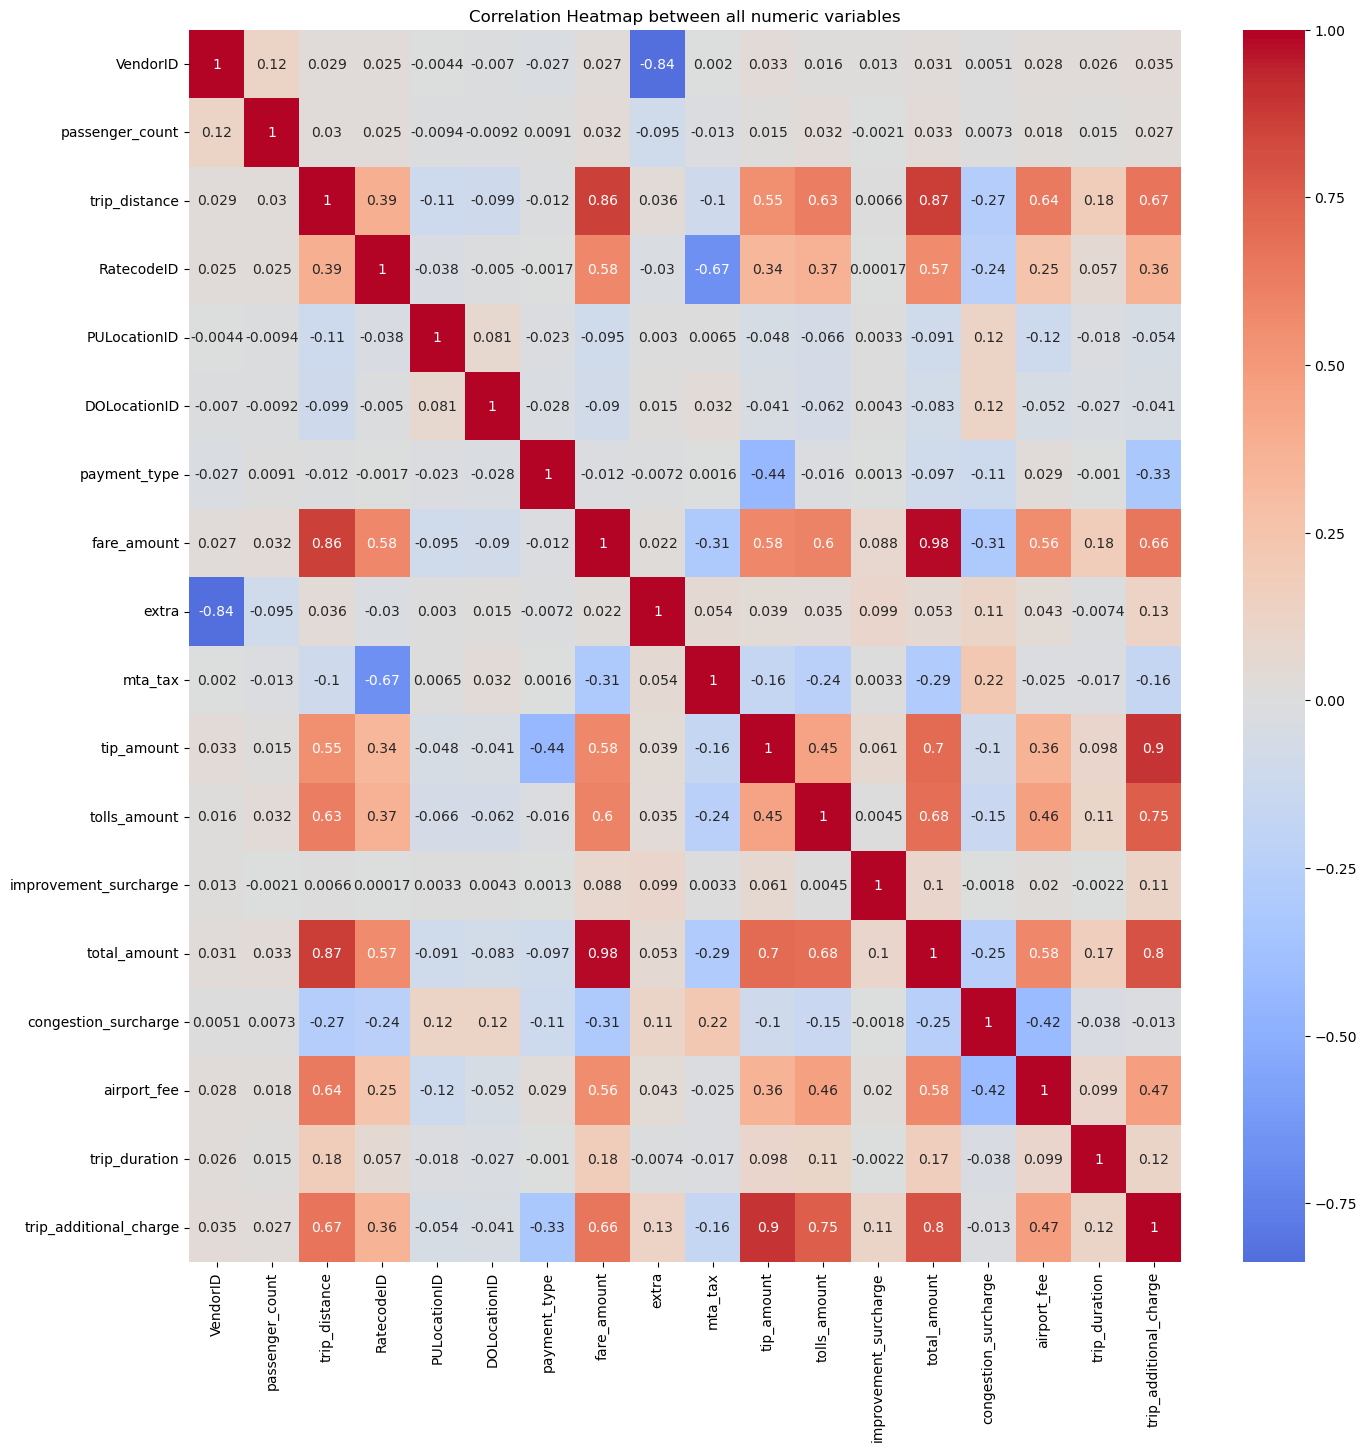

In [101]:
plt.figure(figsize=(16, 16))
sns.heatmap(general_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between all numeric variables')
plt.show()

Since Correlation measures strenght and direction of a linear relationship between 2 variables, the following can be infered :

Positive relationship (meaning that an increase in one variable is accompanied with an increase in the other variable )
- (**0,7 - 0,99**) Strong positive correlation
the **'Tip_amount'**  and **'trip_additional_charge'** obviously strongly correlated since the tips are part of the additional cost that the passengers have to cover ,
**'trip_distance'** and **'total amount'** and logically with the **'fair_amount'** are strongly correlated. It was expected since since generally the fair amount is .

- (**0,3 - 0,69**) Moderate positive correlation 
Moreover the **'trip distance'** seems to positively impact the airport fee and the tolls amount.

By opposition, 

Negative relationship (meaning that an increase in one variable is accompanied with a decrease in the other variable )

- (**-0,3 to -0,69**) Moderate negative correlation
the correlation between the **'tip_amount'** and **'payment_type'** variables seems to indicate that as tips are getting higher the passenger tend to pay the amount cash.


.


**VendorID**    AND    **Store_and_fwd_flag**

Text(0.5, 1.0, 'Cross-Table of VendorID and access to server')

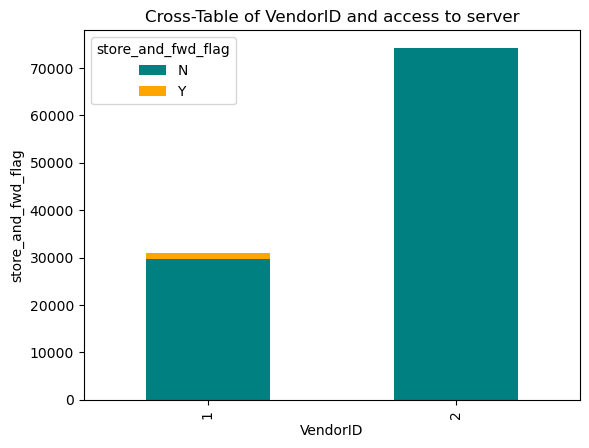

In [54]:
Vendor_Flag = pd.crosstab(yt['VendorID'], yt['store_and_fwd_flag'])
Vendor_Flag.plot(kind='bar', color=['teal', 'orange', 'red'], stacked=True)
plt.xlabel('VendorID')
plt.ylabel('store_and_fwd_flag')
plt.title('Cross-Table of VendorID and access to server')

From the visualization above, it can be infered that **All** the vehicle that did not have a connection to the server are the ones which the records were provided by the vendor "**Creative Mobile technologies, LLC**".

.